## 1. Data preprocessing:

In [2]:
data = pd.read_csv("/datasets/telecom_dataset_us.csv")
clients= pd.read_csv("/datasets/telecom_clients_us.csv")

In [3]:
data.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


In [4]:
data.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
10626,166678,2019-11-10 00:00:00+03:00,out,False,900892.0,True,2,0,59
33892,167497,2019-10-31 00:00:00+03:00,out,False,921116.0,True,4,0,89
19727,166993,2019-09-06 00:00:00+03:00,in,False,901178.0,False,2,64,81
27964,167176,2019-11-01 00:00:00+03:00,in,False,NaN,True,1,0,18
5597,166520,2019-11-18 00:00:00+03:00,out,False,893674.0,False,16,448,702
262,166377,2019-09-25 00:00:00+03:00,out,False,880028.0,True,14,0,193
25502,167141,2019-09-10 00:00:00+03:00,in,False,NaN,True,11,0,83
48662,168187,2019-11-13 00:00:00+03:00,out,False,937808.0,False,10,511,774
38915,167654,2019-11-12 00:00:00+03:00,in,False,918986.0,False,24,3269,3493
4059,166503,2019-09-23 00:00:00+03:00,out,False,906680.0,True,2,0,71


In [5]:
data.tail(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53892,168606,2019-11-08 00:00:00+03:00,out,False,957922.0,False,2,255,328
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121
53894,168606,2019-11-08 00:00:00+03:00,in,False,957922.0,False,2,686,705
53895,168606,2019-11-09 00:00:00+03:00,out,False,957922.0,False,4,551,593
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64


In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 11.1 MB


There are 53902 entries in data. There are missing values in operator_id and internal column.<br>
date column should be converted to datetime dtype. Also, I will try to cut down memory usage.

In [7]:
print(data.duplicated().sum())

4900


There are 4900 duplicates in data.

In [8]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True,drop=True)
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 10.0 MB


After droping the duplicates there are 49002 entries with missing data in operator_id and internal.

In [9]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]*100).round(2)
report

,missing_values,% of total
user_id,0,0.00
date,0,0.00
direction,0,0.00
internal,110,0.22
operator_id,7456,15.22
is_missed_call,0,0.00
calls_count,0,0.00
call_duration,0,0.00
total_call_duration,0,0.00


There is 15% missing data in 'operator_id' and 0.22% in 'internal'.

In [10]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [11]:
data[data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration


There are no more duplicates.

In [12]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d').dt.date
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


I converted the date to and cuuted out the time part that we will not use.

In [13]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 8.1 MB


We cutted memory usage for 3 MB. After filling the missing values in operator_id, we could try to convert the values to integer dtype.

In [14]:
data[data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration


Checking for duplicates after cutting the time extension. All good.

In [15]:
data.operator_id.nunique()

1092

There are 1092 unique operators.

In [16]:
data.user_id.nunique()

307

There are 307 unique users.

In [17]:
clients.head(10)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


First 10 rows of clients dataframe.

In [18]:
clients.describe(include='all')

,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,73
top,NaN,C,2019-09-24
freq,NaN,395,24
mean,167431.927596,NaN,NaN
std,633.810383,NaN,NaN
min,166373.000000,NaN,NaN
25%,166900.750000,NaN,NaN
50%,167432.000000,NaN,NaN
75%,167973.000000,NaN,NaN


There are 732 users in clients frame. tariff_plan C is the most frequent one.

In [19]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 95.2 KB


No missing values.
I will convert date_start to datetime dtype.

In [20]:
clients.duplicated().sum()

0

There are no duplicates in clients set.

In [21]:
clients['date_start'] = pd.to_datetime(clients['date_start'],format='%Y-%m-%d')
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 53.0 KB


date_start has been converted to datetime dtype and so the usage of memory is lower.

In [22]:
len(data[data.user_id.isin(clients.user_id)])

49002

All the observations in data have registreted user_id in clients dataset.

In [23]:
len(clients[clients.user_id.isin(data.user_id)])

307

There are 307 users in data frame from clients frame.

In [24]:
merged_data = pd.merge(data, clients, how='left',on='user_id')
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01


I merged data and clients dataframes into one 'merged_data'.

In [25]:
merged_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  object        
 2   direction            49002 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 11.5 MB


There are only missing values in 'operator_id' and 'internal' column and we should convert date to datetime. 'internal' values I will not convert to boolean because the missing values will transform into True boolean value and this would compromise our data.

In [26]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 10.0 MB


In [27]:
merged_data[merged_data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start


There are no duplicates in merged data.

**Filling the missing values:**

In [28]:
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01


In [29]:
report = merged_data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / merged_data.shape[0]*100).round(2)
report

,missing_values,% of total
user_id,0,0.00
date,0,0.00
direction,0,0.00
internal,110,0.22
operator_id,7456,15.22
is_missed_call,0,0.00
calls_count,0,0.00
call_duration,0,0.00
total_call_duration,0,0.00
tariff_plan,0,0.00


In our merged_data again we see only missing values in operator_id  and internal column.

In [30]:
number_of_operators = data.groupby('user_id')['operator_id'].nunique().reset_index()
number_of_operators.head()

,user_id,operator_id
0,166377,5
1,166391,2
2,166392,3
3,166399,1
4,166405,10


In this table we can see number of unique operators per user.

In [31]:
number_of_operators.operator_id.describe()

count    307.000000
mean       3.557003
std        5.623176
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: operator_id, dtype: float64

We can see users can have from zero to 50 different operatoer, where 0 means the operator is unknown.

In [32]:
len(number_of_operators.query('operator_id!=0'))

290

There are 290 users with known operator. There are 17 users with unknown operator.

In [33]:
number_of_operators.query('operator_id!=0').operator_id.describe()

count    290.000000
mean       3.765517
std        5.717712
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: operator_id, dtype: float64

The most of the users have up to 4 operators.

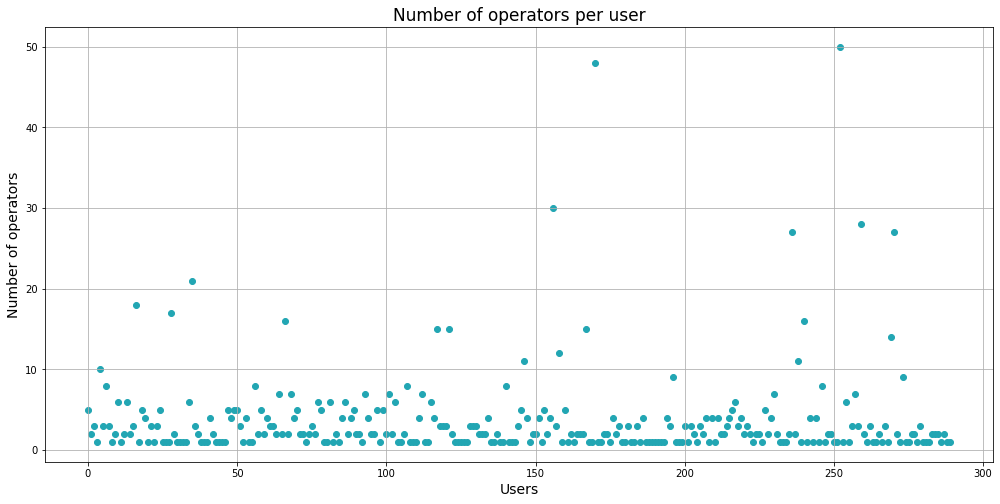

In [34]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(number_of_operators.query('operator_id!=0'))))
ax = plt.scatter(x_values, number_of_operators.query('operator_id!=0').operator_id,color = '#22a6b3')


plt.title('Number of operators per user',fontdict={'size':17})
plt.xlabel('Users',fontdict={'size':14})
plt.ylabel('Number of operators',fontdict={'size':14})
plt.grid()
plt.show()

Here we see vizualization for number of operators per user. There are 7 users with more than 20 operators.

In [35]:
data.groupby('operator_id')['user_id'].nunique().reset_index().head()

,operator_id,user_id
0,879896.0,1
1,879898.0,1
2,880020.0,1
3,880022.0,1
4,880026.0,1


In this table we can see how many different users are assigned to a unique operator_id.

In [36]:
data.groupby('operator_id')['user_id'].nunique().reset_index().query('user_id > 1')

,operator_id,user_id


This tells us that every operator_id is assigned to only one user, but at the same time one user can have more different operators.

In [37]:
merged_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 10.0 MB


In [38]:
merged_data.operator_id.fillna(0,inplace=True)
merged_data.internal.fillna('Unknown',inplace=True)
merged_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  object        
 4   operator_id          49002 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 10.1 MB


For start, I filled the missing values in 'operator_id' with zero and missing values in 'internal' with 'Unknown'.

Now we can convert operator_id values to integer dtype.

In [39]:
merged_data['operator_id'] = merged_data['operator_id'].astype('int')
merged_data['internal'] = merged_data['internal'].astype('str')
merged_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  object        
 4   operator_id          49002 non-null  int64         
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(5), object(3)
memory usage: 11.4 MB


I also converted 'internal' to string so I can use Sweetviz, an open-source Python library in EDA part of the project.

In [40]:
merged_data.duplicated().sum()

0

There are no duplicates in merged_data.

## 2. Exploratory data analysis

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  object        
 4   operator_id          49002 non-null  int64         
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  date_start           49002 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(5), object(3)
memory usage: 4.2+ MB


In [42]:
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01


In [43]:
REPORT= sv.analyze(merged_data)
REPORT.show_html('Advertising.html')


Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Using the Sweetviz library I gathered general informations from the data:

There are 307 distinct users and 119 distinct dates.

There are 2 distinct directions of the calls; 59% of observations with outgoing and 41% with incoming calls.

12% of the calls are internal calls, 88% noninternal and less than 1% of Uknown types.

There are 15% of calls with undefined operator_id (containing zero value).

There are 56% of missed calls and 44% not missed calls.

calls_count range from 1 to maximum 4817. Pearson correlation coefficient between calls_count and total_call_duration is 0.63 and between calls_count and call_duration is 0.51.

call_duration values go from 0 to 144395 seconds. 43.2% of calls have o duration. We should pobably look into it a bit more. There was only one call with duration of 144395 seconds which is 40 hours so we should as well look into the call_duration more thoroughly which is with total_call_duration in strong correlation (0.98; Pearson correlation).

total_call_duration goes from 0 to 166155.

tariff_plan: C (37%), B(35%), A(28%)

In [45]:
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01


In [46]:
merged_data.query('is_missed_call==True & call_duration!=0').head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1471,166405,2019-11-19,in,False,939478,True,1,165,173,B,2019-08-02
1498,166405,2019-11-21,in,False,882686,True,1,1,5,B,2019-08-02
1518,166405,2019-11-22,in,False,882686,True,1,1,5,B,2019-08-02
2089,166407,2019-09-23,in,False,888534,True,1,133,156,A,2019-08-02
2625,166482,2019-11-05,in,False,934074,True,1,1,15,C,2019-08-05


There are calls marked with True in is_missed_call even though call_duration is greater than 0. This kind of calls should have False in the is_missed_call.

In [47]:
merged_data['is_missed_call'] = merged_data.apply(lambda row: not row['is_missed_call'] if \
                                                 (row['is_missed_call']==True and row['call_duration']!=0) else \
                                                 row['is_missed_call'],axis=1)

I labelled all the calls as False (received) calls, where the duration of a call is greater than 0.

In [48]:
merged_data.query('is_missed_call==True & call_duration!=0')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start


I got an empty frame, which means there are no more missed calls with duration greater than zero.

In [49]:
merged_data.query('is_missed_call==False & call_duration==0')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1422,166405,2019-11-16,out,False,902532,False,1,0,27,B,2019-08-02
2684,166485,2019-09-03,out,True,887276,False,1,0,4,B,2019-08-06
8637,166658,2019-11-06,out,True,890410,False,1,0,0,B,2019-08-13
9292,166678,2019-09-04,out,True,888868,False,1,0,5,B,2019-08-14
13497,166874,2019-10-05,out,False,893700,False,2,0,83,C,2019-08-22
19598,167035,2019-10-25,out,False,923528,False,1,0,9,C,2019-08-29
20512,167061,2019-09-01,out,True,901038,False,1,0,7,B,2019-08-29
20596,167071,2019-09-24,out,False,913942,False,1,0,23,B,2019-08-30
21002,167078,2019-10-23,out,True,935348,False,1,0,0,B,2019-08-30
25324,167176,2019-10-18,out,True,907964,False,1,0,3,B,2019-09-05


There are also calls marked as not missed, even though their call_duration is equal to zero. I will also label this calles as missed calls (True in is_missed_call.)

In [50]:
merged_data['is_missed_call'] = merged_data.apply(lambda row: not row['is_missed_call'] if \
                                                 (row['is_missed_call']==False and row['call_duration']==0) else \
                                                 row['is_missed_call'],axis=1)

In [51]:
merged_data.query('is_missed_call==False & call_duration==0')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start


Again, we got an empty frame, which means there are no more wrong labelled calls.

**Define 'waiting_time' for every call.**

In [52]:
merged_data['waiting_time'] = merged_data['total_call_duration'] - merged_data['call_duration']
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01,4
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25


I added a new column 'waiting_time' as difference between 'total_call_duration' and 'call_duration'.

In [53]:
merged_data.waiting_time.describe()

count    49002.000000
mean       290.276111
std       1132.155291
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: waiting_time, dtype: float64

waiting_time ranges from 0 to 46474 seconds.

**Define 'waiting_time_pro_call' for every call.**

In [54]:
merged_data['waiting_time_pro_call'] = (merged_data['waiting_time']/merged_data['calls_count']).round(1)
merged_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01,4,2.0
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3


I added waiting_time_pro_call column. 

In [55]:
merged_data.waiting_time_pro_call.describe()

count    49002.000000
mean        16.828368
std         13.878411
min          0.000000
25%          8.000000
50%         14.500000
75%         22.200000
max        465.000000
Name: waiting_time_pro_call, dtype: float64

Now, we can see that the range of waiting time changed; waiting_time_pro_call ranges from 0 to 465 seconds.

In [56]:
known_operators = merged_data.query('operator_id != 0')
known_operators.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,13.0


From now on I will focus on data where operator_ids are known because we need to focus on identifying ineffective ones.

In [57]:
known_operators.user_id.nunique()

290

Now there are 290 unique users.

In [58]:
REPORT2= sv.analyze(known_operators)
REPORT2.show_html('Advertising.html')


Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Changes in data after cutting out unknown operators:

There are 290 out of 307 distinct users and 118 out of 119 distinct dates.

There are 2 distinct directions of the calls; 69% of observations with outgoing and 31% with incoming calls.(There is 10% more observations now for outgoing calls.)

13% of the calls are internal calls, 87% noninternal and less than 1% of Uknown types. (Now there are 1% more internal calls.)

Now there are 33% of missed calls (instead of 56%) and 67% of received calls (instead of 44%).

tariff_plan: C (36%), B(35%), A(29%) (instead: C (37%), B(35%), A(28%))

In [59]:
known_operators.waiting_time_pro_call.describe()

count    41546.000000
mean        16.541125
std         11.952794
min          0.000000
25%          8.500000
50%         14.700000
75%         21.700000
max        451.200000
Name: waiting_time_pro_call, dtype: float64

We see that average waiting time where operators are known is 16.5 seconds.

In [60]:
unknown_operators = merged_data.query('operator_id == 0')
unknown_operators.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01,4,2.0
7,166377,2019-08-05,in,False,0,True,6,0,35,B,2019-08-01,35,5.8
8,166377,2019-08-06,in,False,0,True,4,0,62,B,2019-08-01,62,15.5
16,166377,2019-08-07,in,False,0,True,2,0,24,B,2019-08-01,24,12.0
26,166377,2019-08-12,in,False,0,True,2,0,34,B,2019-08-01,34,17.0


Here we also have data on calls where operator_id is not known.

In [61]:
unknown_operators.waiting_time_pro_call.describe()

count    7456.000000
mean       18.428930
std        21.605769
min         0.000000
25%         2.900000
50%        13.800000
75%        27.000000
max       465.000000
Name: waiting_time_pro_call, dtype: float64

Average waiting_time_pro_call is 18 seconds, 2 seconds more than at known operators.

**Check the outliers and artifacts.**

In [62]:
def upper_range(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    upper_value = Q3 + (1.5 * IQR)
    return upper_value

I created a function upper_range that takes a column from data and returns upper range of this column.

In [63]:
known_operators.calls_count.describe()

count    41546.000000
mean        16.900424
std         59.749373
min          1.000000
25%          1.000000
50%          4.000000
75%         13.000000
max       4817.000000
Name: calls_count, dtype: float64

calls_count range from 1 to 4817 by known_operators.

In [64]:
upper_range(known_operators.calls_count)

31.0

We should consider calls_count over 31 to be outliers.

In [65]:
known_operators.call_duration.describe()

count     41546.000000
mean       1009.769172
std        4064.106117
min           0.000000
25%           0.000000
50%         106.000000
75%         770.000000
max      144395.000000
Name: call_duration, dtype: float64

call_duration ranges from 0 to 144395 in known_operators.

In [66]:
upper_range(known_operators.call_duration)

1925.0

Everything what is over 1925 in call_duration we should consider to be an outlier.

In [67]:
known_operators.query('call_duration==144395')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
6318,166582,2019-09-25,out,False,885876,False,1230,144395,166155,A,2019-08-09,21760,17.7


User under user_id 166582 made 1230 calls on 2019-09-25. Call_duration was 144395 seconds with waiting time 21760.

In [68]:
(known_operators.query('call_duration==144395').call_duration/known_operators.query('call_duration==144395').calls_count)/60

6318    1.956572
dtype: float64

Average call duration from this observation is around 2 minutes. 

In [69]:
known_operators.total_call_duration.describe()

count     41546.000000
mean       1321.592813
std        4785.978633
min           0.000000
25%          67.000000
50%         288.000000
75%        1104.000000
max      166155.000000
Name: total_call_duration, dtype: float64

In [70]:
upper_range(known_operators.total_call_duration)

2659.5

Everything what is over 2659 in total_call_duration we should consider to be an outlier.

In [71]:
known_operators.waiting_time.describe()

count    41546.000000
mean       311.823641
std       1175.373073
min          0.000000
25%         19.000000
50%         60.000000
75%        219.000000
max      46474.000000
Name: waiting_time, dtype: float64

In [72]:
upper_range(known_operators.waiting_time)

519.0

Everything what is over 519 in waiting_time we should consider to be an outlier.

In [73]:
known_operators.waiting_time_pro_call.describe()

count    41546.000000
mean        16.541125
std         11.952794
min          0.000000
25%          8.500000
50%         14.700000
75%         21.700000
max        451.200000
Name: waiting_time_pro_call, dtype: float64

waiting_time_pro_call in known_operators ranges from o to 451 seconds.

In [74]:
upper_range(known_operators.waiting_time_pro_call)

41.5

Everything what is over 41.5 in waiting_time_pro_call we should consider to be an outlier.

I will delete outliers for call_duration first and then check the data.

In [75]:
np.percentile(known_operators.call_duration,[95,99])

array([ 4161. , 10982.5])

Not more than 5% of call_duration is higher than 4161 seconds. Not more than 1% of call_duration is higher than 10982.5 seconds.

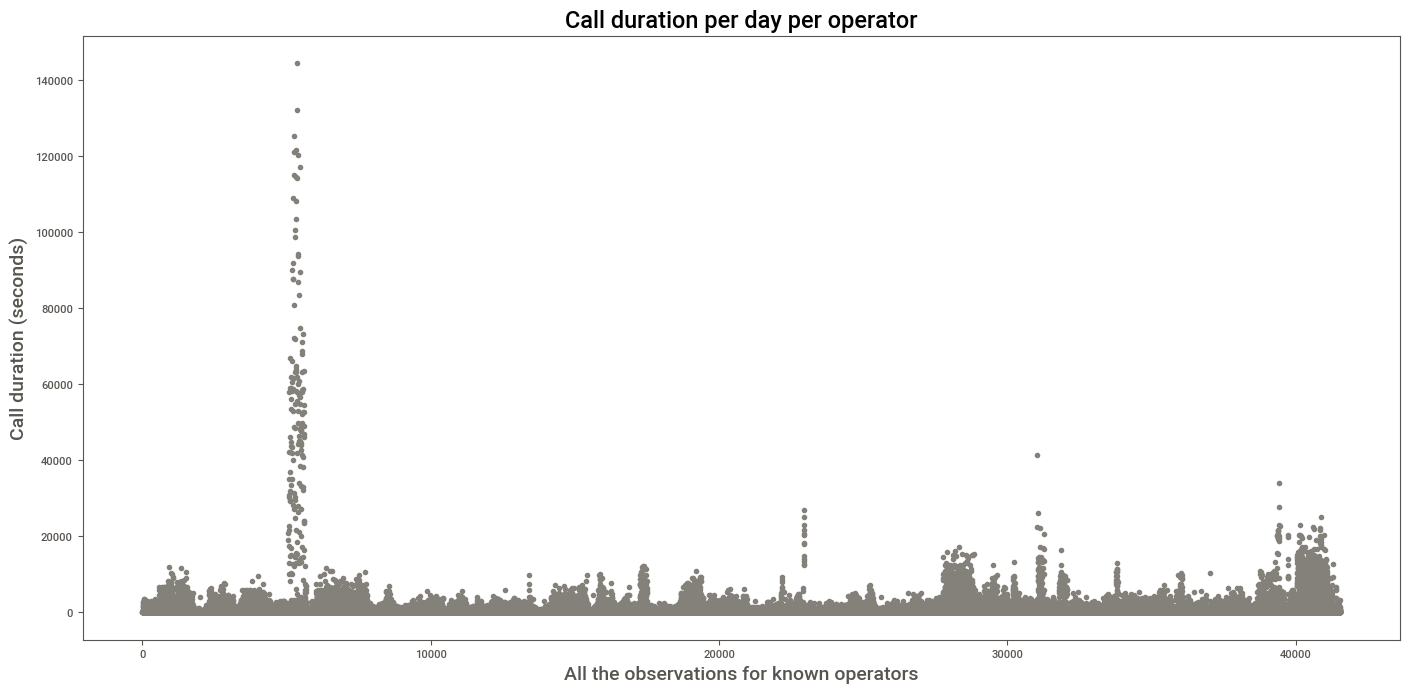

In [76]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(known_operators)))
ax = plt.scatter(x_values, known_operators.call_duration,color = '#84817a')


plt.title('Call duration per day per operator',fontdict={'size':17})
plt.xlabel('All the observations for known operators',fontdict={'size':14})
plt.ylabel('Call duration (seconds)',fontdict={'size':14})
plt.show()

Call duration per day 80 000 seconds is actually more than 22 hours. Everything over 85 000 seconds I will consider as an anomally data points because it is not possible for one operator to do almost 24 hours total call duration per day.

In [77]:
len(known_operators)

41546

There are 41546 observations in known_operators dataframe.

In [78]:
known_operators = known_operators.query('call_duration < 85000')
len(known_operators)

41523

Now there are 23 observations less in known_operators.

In [79]:
known_operators.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,13.0


Remembering that total_call_duration includes call_duration + waiting_time. Let't check total_call_duration.

In [80]:
known_operators.total_call_duration.describe()

count     41523.000000
mean       1253.891578
std        3805.242358
min           0.000000
25%          67.000000
50%         288.000000
75%        1102.000000
max      100139.000000
Name: total_call_duration, dtype: float64

max value is 100139 seconds for total_call_duration for one operator for one day, which is more than 27 hours, which is impossible. Let's see the scatterness of total_call_duration.

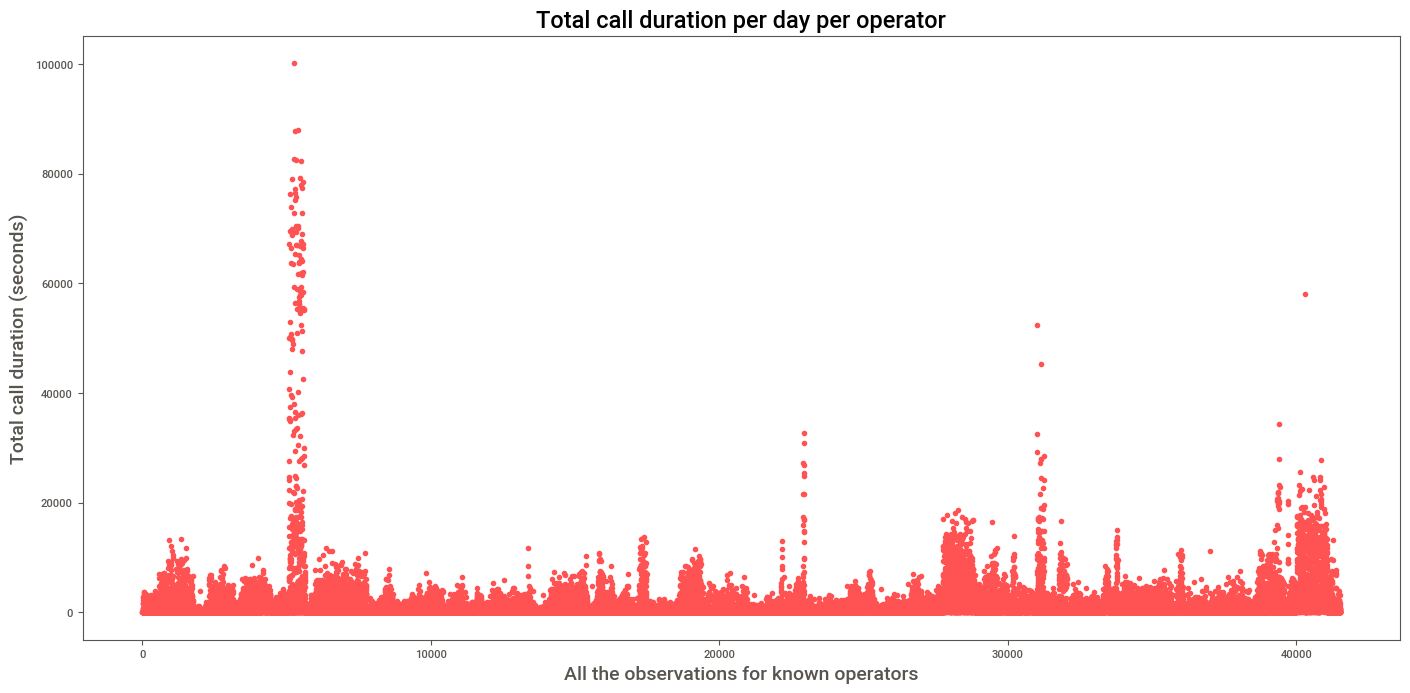

In [81]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(known_operators)))
ax = plt.scatter(x_values, known_operators.total_call_duration,color = '#ff5252')


plt.title('Total call duration per day per operator',fontdict={'size':17})
plt.xlabel('All the observations for known operators',fontdict={'size':14})
plt.ylabel('Total call duration (seconds)',fontdict={'size':14})
plt.show()

I will consider total_call_duration greater than 85000 seconds (almost 24 hours) to be an anomalie data point.

In [82]:
len(known_operators)

41523

In [83]:
known_operators = known_operators.query('total_call_duration < 85000')
len(known_operators)

41520

After deleting the anomalie data points, we have 41520 observations in known_operators dataframe.

**Check the correlation between features.**

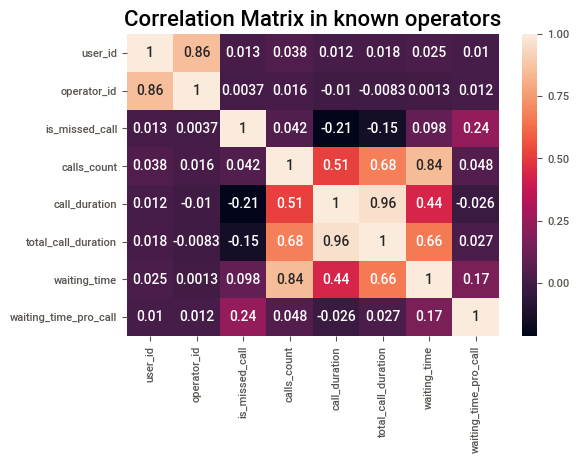

In [84]:
corrMatrix = known_operators.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix in known operators', fontsize=16)
plt.show()

Here we can see the visualizations of the features from known_operators.

Correlation table changed a bit after I splitted the data. known_operators table now shows strong correlation between operator_id and user_id (0.86), in merged_data was 0.072.<br>
As well, we can see correlation between operator_id and is_missed_call changed. Before splitting the data correlation was -0.47 and now is 0.0037.

## 3. Identify ineffective operators

1. Identifying different types of operators

2. Incoming calls

3. Outgoing calls by outgoing calls only operators 

### 1. Identifying different types of operators.

In [85]:
known_operators.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,13.0


In [86]:
known_operators.operator_id.nunique()

1092

There are 1092 operators.

In [88]:
known_operators.query('direction =="in"').operator_id.nunique()

754

There are 754 operators that have made incoming calls.

In [89]:
incoming_calls_operators = known_operators.query('direction =="in"').operator_id.unique().tolist()

incoming_calls_operators is a list of operators that made incoming calls.

In [90]:
known_operators.query('direction =="out"').operator_id.nunique()

882

There are 882 operators that have made outgoing calls.

In [91]:
outgoing_calls_operators = known_operators.query('direction =="out"').operator_id.unique().tolist()

outgoing_calls_operators is a list of operators that made outgoing calls.

In [92]:
in_calls = known_operators.query('direction =="in"')
in_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
25,166377,2019-08-12,in,False,880028,False,1,407,411,B,2019-08-01,4,4.0
32,166377,2019-08-13,in,False,880028,False,1,88,102,B,2019-08-01,14,14.0
35,166377,2019-08-14,in,False,880026,False,2,197,218,B,2019-08-01,21,10.5
37,166377,2019-08-14,in,False,880028,False,1,33,37,B,2019-08-01,4,4.0
45,166377,2019-08-15,in,False,880028,False,1,23,27,B,2019-08-01,4,4.0


in_calls are only incoming types of calls.

In [93]:
in_calls[~in_calls['operator_id'].isin(outgoing_calls_operators)].operator_id.unique()

array([882476, 886892, 891900, 891906, 886674, 882680, 928202, 898676,
       884294, 934076, 934074, 925106, 884524, 910958, 946468, 889638,
       887416, 955436, 932460, 889640, 888520, 925808, 942214, 934608,
       901734, 891646, 891254, 903390, 895170, 909624, 894120, 919994,
       891948, 954616, 901350, 910226, 910044, 913886, 910038, 919896,
       924662, 930242, 945710, 894614, 895140, 896538, 896536, 903512,
       927070, 895578, 895576, 895574, 896012, 896020, 895786, 895782,
       898560, 898558, 899268, 899892, 899900, 899898, 899906, 899912,
       901894, 904284, 901498, 910516, 911136, 911138, 911102, 911142,
       911140, 911152, 911104, 956480, 956484, 904058, 922356, 920982,
       902906, 902910, 950640, 903974, 903976, 905082, 928092, 907502,
       905300, 904372, 905478, 907618, 908300, 908180, 908152, 908130,
       909392, 908162, 908098, 923646, 962168, 911214, 909896, 909894,
       907974, 910018, 912684, 946032, 946020, 910224, 909768, 910540,
      

This are all observations with incoming calls that are not in the list of operators that made outgoing calls.

In [94]:
operators_incoming_only = in_calls[~in_calls['operator_id'].isin(outgoing_calls_operators)].operator_id.unique().tolist()
len(operators_incoming_only)

210

There are 210 operators that made only incoming calls.

In [95]:
out_calls = known_operators.query('direction =="out"')
out_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,13.0


out_calls are only incoming types of calls.

In [96]:
out_calls[~out_calls['operator_id'].isin(incoming_calls_operators)].operator_id.unique()

array([881278, 880240, 907442, 960950, 887280, 906866, 884402, 884406,
       883018, 883898, 885682, 890234, 890232, 892028, 893674, 891192,
       897894, 909452, 910902, 910926, 923250, 939236, 947480, 930524,
       969600, 887992, 892800, 895370, 890416, 891166, 891152, 891154,
       891158, 890420, 890422, 891170, 891162, 891160, 891156, 891746,
       908984, 916596, 919418, 932050, 932088, 943050, 950444, 954642,
       972408, 972410, 965328, 891250, 891252, 891970, 894226, 891976,
       894934, 955820, 893700, 917890, 896008, 928282, 928284, 955094,
       955090, 955082, 955068, 955086, 910594, 896390, 896386, 896384,
       914626, 909502, 914036, 898902, 899788, 899972, 899932, 899968,
       899790, 899964, 898434, 899076, 962904, 910520, 910530, 910532,
       910524, 930914, 930912, 963716, 907180, 909910, 907998, 933452,
       942174, 951648, 909308, 902746, 902782, 902742, 902744, 902748,
       902778, 902774, 902776, 905570, 905840, 938842, 905470, 905480,
      

This are all the operators with outgoing calls that are not in the list of operators that made incoming calls.

In [97]:
operators_outgoing_only = out_calls[~out_calls['operator_id'].isin(incoming_calls_operators)].operator_id.unique().tolist()
len(operators_outgoing_only)

338

There are 338 operator that made only outgoing calls.

There are 1092 operators in total.

210 made only incoming calls, 338 made only outgoing calls and the rest (544) made incoming and outgoing calls.

In [98]:
known_operators.query('user_id==166901').groupby('operator_id')['direction'].unique()

operator_id
896008        [out]
896010    [out, in]
896012         [in]
896014    [in, out]
896016    [out, in]
896018    [in, out]
896020         [in]
Name: direction, dtype: object

This is the example of the user that uses 2 only incoming calls operator, 1 outgoing calls operator and 4 operators that combine incoming and outgoing calls.

In [99]:
all_operators = known_operators.operator_id.unique().tolist()

Here we have the list of all operators.

In [100]:
X = known_operators[known_operators.operator_id.isin(incoming_calls_operators)]
X[X.operator_id.isin(outgoing_calls_operators)].head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,1.7
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,1.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,8.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,8.3
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,13.0


In X table we have all observations with operators that made incoming and outgoing calls.

In [101]:
in_out_operators = X[X.operator_id.isin(outgoing_calls_operators)].operator_id.tolist()

Here we have the list of operators that made incoming and outgoing calls.

In [102]:
X[X.operator_id.isin(outgoing_calls_operators)].operator_id.nunique()

544

Here we checked that there are actually 544 these kind of operators.

In the further analysis we need to check to which group a certain operator belongs to.

### 2. Incoming missed calls:
**Share of missed calls by operator**

In [103]:
known_operators.query('direction=="in"').head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
25,166377,2019-08-12,in,False,880028,False,1,407,411,B,2019-08-01,4,4.0
32,166377,2019-08-13,in,False,880028,False,1,88,102,B,2019-08-01,14,14.0
35,166377,2019-08-14,in,False,880026,False,2,197,218,B,2019-08-01,21,10.5
37,166377,2019-08-14,in,False,880028,False,1,33,37,B,2019-08-01,4,4.0
45,166377,2019-08-15,in,False,880028,False,1,23,27,B,2019-08-01,4,4.0


In [104]:
known_operators.query('direction=="in"').operator_id.nunique()

754

There are 754 operators that made incoming callls.

In [105]:
known_operators.query('direction=="in"').is_missed_call.value_counts()

False    12323
True       410
Name: is_missed_call, dtype: int64

There are 410 missed calls and 12323 calls that were not missed.

In [106]:
A = known_operators.query('direction=="in"').groupby(['operator_id','is_missed_call'])[['calls_count','waiting_time']].sum().reset_index()
A.head()

,operator_id,is_missed_call,calls_count,waiting_time
0,879896,False,58,574
1,879898,False,104,1680
2,880020,False,7,54
3,880022,False,8,112
4,880026,False,24,143


Here I grouped observations by operator_id and is_missed_call and summed up the calls_count and waiting_time.

In [107]:
total_in_calls = A.groupby('operator_id')['calls_count'].sum().reset_index()
total_in_calls.head()

,operator_id,calls_count
0,879896,58
1,879898,104
2,880020,7
3,880022,8
4,880026,24


In this frame we have total number of incoming calls for every operator (operators that made incoming calls.)

In [108]:
total_in_calls.columns = ['operator_id','total_calls']
total_in_calls.head()

,operator_id,total_calls
0,879896,58
1,879898,104
2,880020,7
3,880022,8
4,880026,24


I renamed the columns names.

In [109]:
A.head()

,operator_id,is_missed_call,calls_count,waiting_time
0,879896,False,58,574
1,879898,False,104,1680
2,880020,False,7,54
3,880022,False,8,112
4,880026,False,24,143


In [110]:
missed_in_calls = A.query('is_missed_call==True').groupby('operator_id')['calls_count'].sum().reset_index()
missed_in_calls.head()

,operator_id,calls_count
0,882680,3
1,882684,4
2,882686,4
3,882690,2
4,884408,1


I sliced the A table and took only calls which are missed and then grouped by operator_id and summed up the calls_count.

In [111]:
len(missed_in_calls)

169

There are 169 operators where missed incoming calls have been made. In this table we can see the number of missed calls.

In [112]:
missed_in_calls.columns = ['operator_id','missed_calls_count']
missed_in_calls.head()

,operator_id,missed_calls_count
0,882680,3
1,882684,4
2,882686,4
3,882690,2
4,884408,1


I renamed the columns names.

In [113]:
missed_in_calls = pd.merge(missed_in_calls, total_in_calls, on ='operator_id', how='left')
missed_in_calls.head()

,operator_id,missed_calls_count,total_calls
0,882680,3,99
1,882684,4,613
2,882686,4,766
3,882690,2,171
4,884408,1,35


I merged missed_in_calls and total_in_calls so I can have in one table missed_calls_count and  total_calls for operators that have missed calls.

In [114]:
missed_in_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   operator_id         169 non-null    int64
 1   missed_calls_count  169 non-null    int64
 2   total_calls         169 non-null    int64
dtypes: int64(3)
memory usage: 5.3 KB


All looks ok.

In [115]:
missed_in_calls['share_of_missed_calls'] = (missed_in_calls['missed_calls_count']/missed_in_calls['total_calls']*100).round(2)
missed_in_calls.head()

,operator_id,missed_calls_count,total_calls,share_of_missed_calls
0,882680,3,99,3.03
1,882684,4,613,0.65
2,882686,4,766,0.52
3,882690,2,171,1.17
4,884408,1,35,2.86


in share_of_missed_calls column we got a percentage of missed calls.

In [116]:
missed_in_calls.share_of_missed_calls.describe()

count    169.000000
mean       4.038343
std        6.546015
min        0.090000
25%        0.520000
50%        1.440000
75%        4.350000
max       33.330000
Name: share_of_missed_calls, dtype: float64

In [117]:
upper_range(missed_in_calls.share_of_missed_calls)

10.094999999999999

Any value higher than the upper bound (10%) is considered to be an outlier.

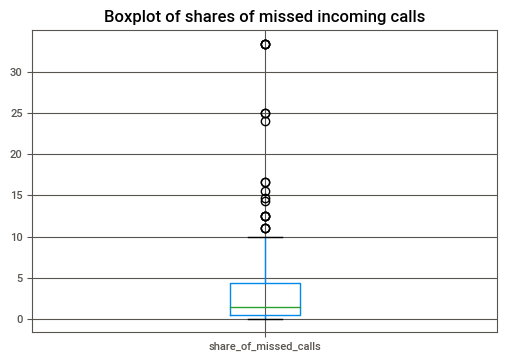

In [118]:
plt.title('Boxplot of shares of missed incoming calls')
missed_in_calls.boxplot(column=['share_of_missed_calls'])
plt.show()

Here we can see where are the most of the shares of missing incoming calls. Everything greater than upper bound is considered to be an outlier so I will look better into these data points.

In [119]:
missed_in_calls.head()

,operator_id,missed_calls_count,total_calls,share_of_missed_calls
0,882680,3,99,3.03
1,882684,4,613,0.65
2,882686,4,766,0.52
3,882690,2,171,1.17
4,884408,1,35,2.86


In [120]:
missed_in_calls = missed_in_calls.query('share_of_missed_calls > 10').sort_values(by='share_of_missed_calls',ascending=False)
missed_in_calls

,operator_id,missed_calls_count,total_calls,share_of_missed_calls
165,957922,1,3,33.33
28,897872,1,3,33.33
124,937432,1,3,33.33
118,934098,2,6,33.33
98,924936,2,8,25.00
112,930242,1,4,25.00
48,905300,6,25,24.00
12,890228,1,6,16.67
9,888532,2,12,16.67
157,944226,28,180,15.56


Here we have all the operators which have missed incoming calls more than 10%. We can see the biggest share of missed calls have operators that don't have a lot of total_calls. 3 total calls and 1 missed call.

In [121]:
len(missed_in_calls)

19

There are 19 operators that have more than 10% of missing calls.

In [122]:
missed_in_calls[missed_in_calls.operator_id.isin(operators_incoming_only)]

,operator_id,missed_calls_count,total_calls,share_of_missed_calls
118,934098,2,6,33.33
98,924936,2,8,25.00
112,930242,1,4,25.00
48,905300,6,25,24.00
22,894614,1,8,12.50
61,911102,3,27,11.11


These operators are operators for only incoming calls.

In [123]:
missed_in_calls[missed_in_calls.operator_id.isin(operators_outgoing_only)]

,operator_id,missed_calls_count,total_calls,share_of_missed_calls


There are no only outgoing calls operators.

In [124]:
missed_in_calls['color'] = ['red' if x in (operators_incoming_only) else 'green' for x in missed_in_calls.operator_id]
missed_in_calls.sort_values(by='share_of_missed_calls')

,operator_id,missed_calls_count,total_calls,share_of_missed_calls,color
8,888406,1,9,11.11,green
107,928382,1,9,11.11,green
61,911102,3,27,11.11,red
22,894614,1,8,12.50,red
78,918888,1,8,12.50,green
104,926872,3,24,12.50,green
167,959312,7,56,12.50,green
152,941844,1,7,14.29,green
50,905862,15,102,14.71,green
157,944226,28,180,15.56,green


I added red color for operators that are only incoming calls and green color is for operators that do both incoming and outgoing calls.

In [125]:
missed_in_calls['operator_id'] = missed_in_calls['operator_id'].astype(str)
missed_in_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 165 to 8
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   operator_id            19 non-null     object 
 1   missed_calls_count     19 non-null     int64  
 2   total_calls            19 non-null     int64  
 3   share_of_missed_calls  19 non-null     float64
 4   color                  19 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 912.0+ bytes


For the purposes of plotting I have converted operator_id in missed_in_calls to an object dtype.

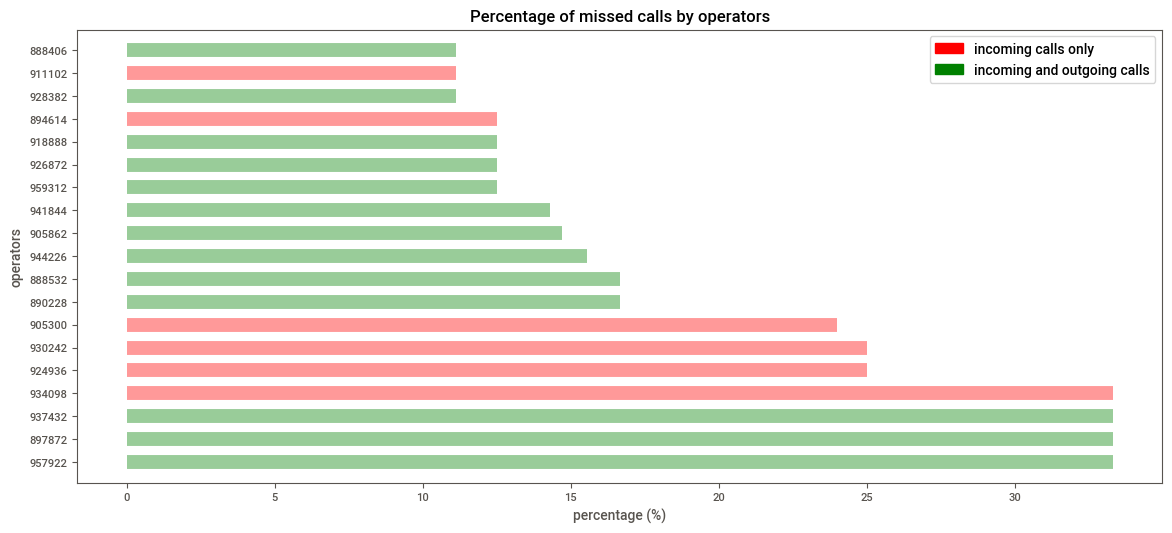

In [126]:
plt.figure(figsize=(14,6))
plt.hlines(y = missed_in_calls.operator_id, xmax = missed_in_calls.share_of_missed_calls, xmin = 0,\
           color = missed_in_calls.color, alpha=0.4, linewidth=10)
plt.title('Percentage of missed calls by operators')
plt.xlabel('percentage (%)')
plt.ylabel('operators')
red_patch = mpatches.Patch(color='red', label='incoming calls only')
green_patch = mpatches.Patch(color='green', label='incoming and outgoing calls')
plt.legend(handles=[red_patch, green_patch])
plt.show()

Here we can see top 6 operators (incoming calls only) that have the highest share of missed_calls.

Also, we can see 13 operators (incoming & outgoing calls) that have the highest share of missed_calls.

**Average waiting time for incoming missed calls**

In [127]:
A.head()

,operator_id,is_missed_call,calls_count,waiting_time
0,879896,False,58,574
1,879898,False,104,1680
2,880020,False,7,54
3,880022,False,8,112
4,880026,False,24,143


In A frame are operators that made incoming calls.

In [128]:
A['avg_waiting_time_pro_call'] = (A['waiting_time']/A['calls_count']).round(1)
A.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
0,879896,False,58,574,9.9
1,879898,False,104,1680,16.2
2,880020,False,7,54,7.7
3,880022,False,8,112,14.0
4,880026,False,24,143,6.0


I added avg_waiting_time_pro_call column in A dataframe.

In [129]:
avg_wait_time_missed_call = A.query('is_missed_call==True').sort_values(by='avg_waiting_time_pro_call',ascending=False)
avg_wait_time_missed_call.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
205,902532,True,1,111,111.0
344,911310,True,3,283,94.3
627,937732,True,1,69,69.0
274,906408,True,2,129,64.5
421,919792,True,1,63,63.0


Here looking up into missed calls.

In [130]:
len(avg_wait_time_missed_call)

169

There are 169 out of 1092 operators with missed incomming calls, which is around 15%.

In [131]:
avg_wait_time_missed_call.avg_waiting_time_pro_call.describe()

count    169.000000
mean      20.095266
std       17.433475
min        1.000000
25%        8.500000
50%       15.000000
75%       25.700000
max      111.000000
Name: avg_waiting_time_pro_call, dtype: float64

Average waiting time pro call in missed incoming calls is around 20 sec.

In [132]:
upper_range(avg_wait_time_missed_call.avg_waiting_time_pro_call)

51.5

If an average waiting time pro missing call is greater than 51.5 we should consider these points as outliers.
This includes incoming only call operators and in&out call operators. 

In [133]:
Z1 = avg_wait_time_missed_call.query('avg_waiting_time_pro_call > 51.5')
Z1

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
205,902532,True,1,111,111.0
344,911310,True,3,283,94.3
627,937732,True,1,69,69.0
274,906408,True,2,129,64.5
421,919792,True,1,63,63.0
16,882690,True,2,120,60.0
355,913788,True,2,120,60.0
225,904038,True,2,115,57.5
748,944216,True,16,917,57.3
43,888532,True,2,106,53.0


In this frame we have operators with missed calls with average waiting time pro call greater than 51.5 

In [134]:
Z1['color'] = ['red' if x in (operators_incoming_only) else 'green' for x in Z1.operator_id]
Z1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call,color
205,902532,True,1,111,111.0,green
344,911310,True,3,283,94.3,green
627,937732,True,1,69,69.0,green
274,906408,True,2,129,64.5,green
421,919792,True,1,63,63.0,green
16,882690,True,2,120,60.0,green
355,913788,True,2,120,60.0,green
225,904038,True,2,115,57.5,green
748,944216,True,16,917,57.3,green
43,888532,True,2,106,53.0,green


We can see that all operators have 'color' green which means highest avg_waiting_time_pro_call have in&out operators.

In [135]:
Z1['operator_id'] = Z1['operator_id'].astype(str)
Z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 205 to 43
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operator_id                10 non-null     object 
 1   is_missed_call             10 non-null     bool   
 2   calls_count                10 non-null     int64  
 3   waiting_time               10 non-null     int64  
 4   avg_waiting_time_pro_call  10 non-null     float64
 5   color                      10 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 490.0+ bytes


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I converted operator_id values to object so it is easier to display the visualtization.

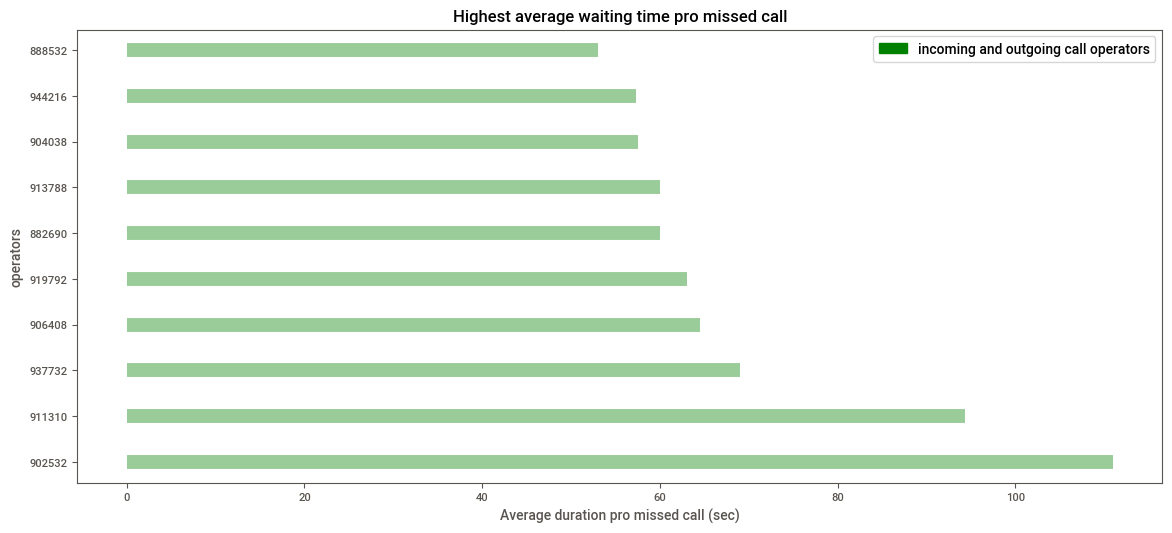

In [136]:
plt.figure(figsize=(14,6))
plt.hlines(y = Z1.operator_id, xmax = Z1.avg_waiting_time_pro_call, xmin = 0,\
           color = Z1.color, alpha=0.4, linewidth=10)
plt.title('Highest average waiting time pro missed call')
plt.xlabel('Average duration pro missed call (sec)')
plt.ylabel('operators')
green_patch = mpatches.Patch(color='green', label='incoming and outgoing call operators')
plt.legend(handles=[green_patch])
plt.show()

Here we can see 10 operators that have the highest average waiting time in missed incoming calls.

**Average waiting time for incoming received calls**

In [137]:
known_operators.query('direction=="in" & is_missed_call==False').operator_id.nunique()

754

There are 754 operators with incoming received calls.

In [138]:
A.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
0,879896,False,58,574,9.9
1,879898,False,104,1680,16.2
2,880020,False,7,54,7.7
3,880022,False,8,112,14.0
4,880026,False,24,143,6.0


In [139]:
avg_wait_time_received_call = A.query('is_missed_call==False')
avg_wait_time_received_call.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
0,879896,False,58,574,9.9
1,879898,False,104,1680,16.2
2,880020,False,7,54,7.7
3,880022,False,8,112,14.0
4,880026,False,24,143,6.0


We are looking into received calls now.

In [140]:
avg_wait_time_received_call.avg_waiting_time_pro_call.describe()

count    754.000000
mean      17.458621
std       12.162362
min        0.700000
25%        9.500000
50%       14.350000
75%       21.575000
max      115.500000
Name: avg_waiting_time_pro_call, dtype: float64

Range of avg_waiting_time_pro_call in received calls is from 0.7 to 115 seconds.

In [141]:
upper_range(avg_wait_time_received_call.avg_waiting_time_pro_call)

39.68750000000001

Average waiting time greater than 39.68 seconds is considerd to be very high waiting time and an outlier.

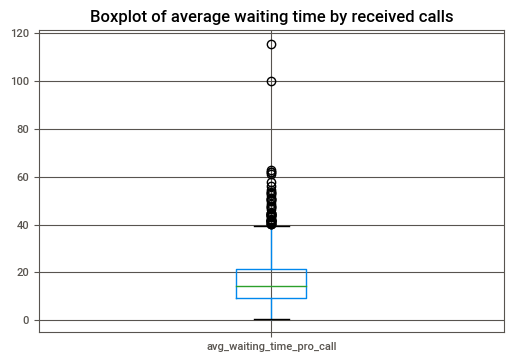

In [142]:
plt.title('Boxplot of average waiting time by received calls')
avg_wait_time_received_call.boxplot(column=['avg_waiting_time_pro_call'])
plt.show()

Here is the visualization where we can see the most operators and their average time and the outliers.

In [143]:
V1 = avg_wait_time_received_call[avg_wait_time_received_call.operator_id.isin(operators_incoming_only)]
V1.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
6,882476,False,3,95,31.7
8,882680,False,96,1498,15.6
19,884294,False,1,6,6.0
24,884524,False,2,19,9.5
31,886674,False,11,168,15.3


In this frame we are looking into avg_waiting_time_pro_call in received calls by incoming calls only operators.

In [144]:
V1.avg_waiting_time_pro_call.describe()

count    210.000000
mean      19.493333
std       12.063550
min        0.900000
25%       13.000000
50%       16.600000
75%       25.000000
max       62.000000
Name: avg_waiting_time_pro_call, dtype: float64

We can see that 75% of incoming only operators have  25 seconds for an average waiting time pro received call. Average waiting time is around 19 seconds.

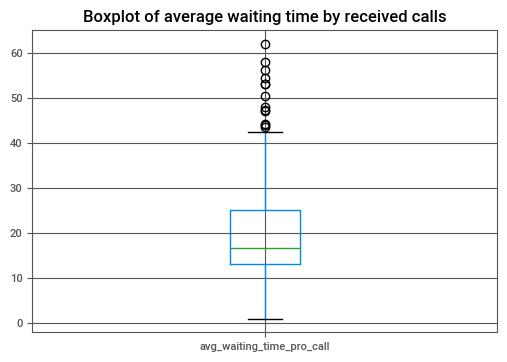

In [145]:
plt.title('Boxplot of average waiting time by received calls')
V1.boxplot(column=['avg_waiting_time_pro_call'])
plt.show()

Here is the visualization where we can see the most operators and their average time and the outliers operators.

In [146]:
upper_range(V1.avg_waiting_time_pro_call)

43.0

Every average waiting time pro received call higher than 43 by incoming calls only operators is considered to be an outlier.

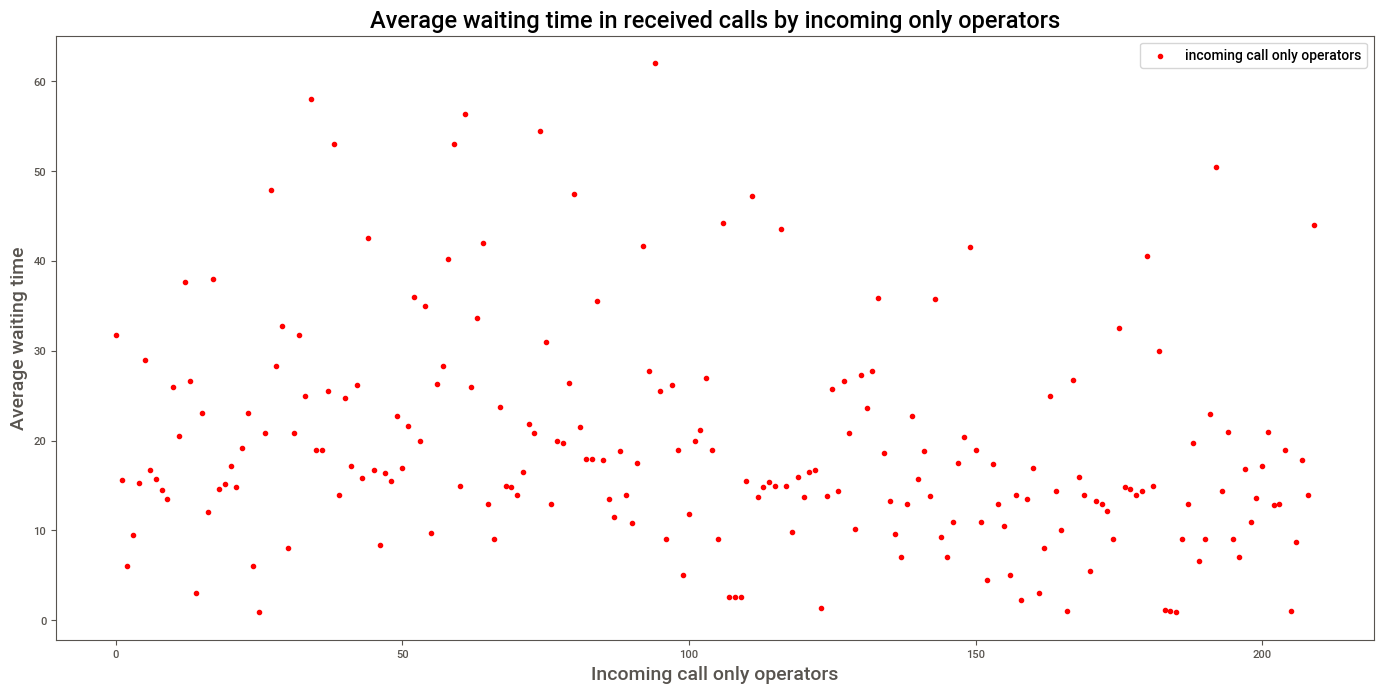

In [147]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(V1)))
ax = plt.scatter(x_values, V1.avg_waiting_time_pro_call,label='incoming call only operators',color = 'red')


plt.title('Average waiting time in received calls by incoming only operators',fontdict={'size':17})
plt.xlabel('Incoming call only operators',fontdict={'size':14})
plt.ylabel('Average waiting time',fontdict={'size':14})
plt.legend()
plt.show()

Visualization for average waiting time by received calls in incoming calls only operators.

In [148]:
V = V1.query('avg_waiting_time_pro_call > 43')
V

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
133,896538,False,13,623,47.9
156,899900,False,2,116,58.0
189,901498,False,5,265,53.0
307,908162,False,3,159,53.0
309,908300,False,3,169,56.3
329,910958,False,13,709,54.5
339,911142,False,18,853,47.4
442,920930,False,1,62,62.0
510,927070,False,32,1415,44.2
519,928092,False,5,236,47.2


Theses are incoming call only operators with highest averages waiting time pro received call.

In [149]:
V['operator_id'] = V['operator_id'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I converted operator_id to object dtype for easier plotting.

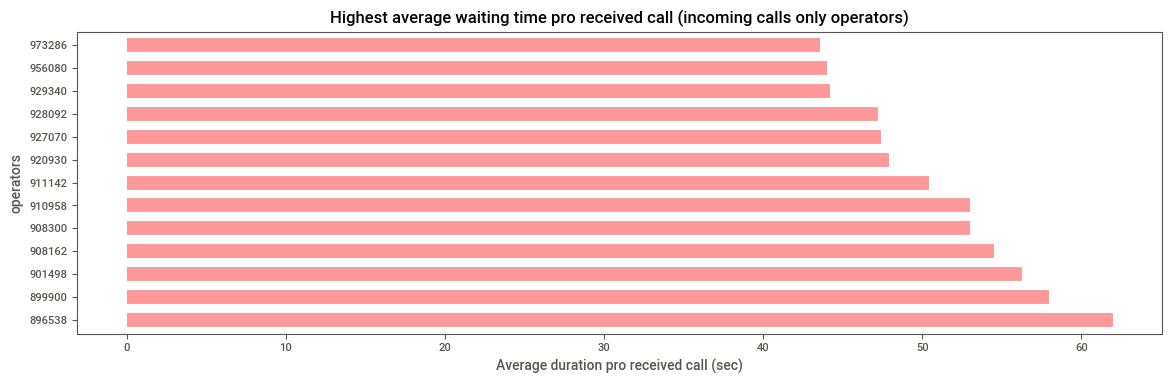

In [150]:
plt.figure(figsize=(14,4))
plt.hlines(y = V.operator_id, xmax = V.sort_values(by='avg_waiting_time_pro_call',ascending=False).avg_waiting_time_pro_call,\
                                           xmin = 0,color = 'red', alpha=0.4, linewidth=10)
plt.title('Highest average waiting time pro received call (incoming calls only operators)')
plt.xlabel('Average duration pro received call (sec)')
plt.ylabel('operators')
plt.show()

Here is the visualization for incoming call only operators with highest averages waiting time pro received call.

In [151]:
W1 = avg_wait_time_received_call[~avg_wait_time_received_call.operator_id.isin(operators_incoming_only)]
W1.head()

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
0,879896,False,58,574,9.9
1,879898,False,104,1680,16.2
2,880020,False,7,54,7.7
3,880022,False,8,112,14.0
4,880026,False,24,143,6.0


In this frame we have operators with in&out calls and their average waiting time in received calls.

In [152]:
W1.avg_waiting_time_pro_call.describe()

count    544.000000
mean      16.673162
std       12.120133
min        0.700000
25%        9.000000
50%       13.350000
75%       20.500000
max      115.500000
Name: avg_waiting_time_pro_call, dtype: float64

We can see that 75% of in&out operators have 20 seconds for an average waiting time pro received call. Average waiting time is around 16 seconds. So, it seems in&out call operators have smaller waiting time than only incoming operators.

In [153]:
upper_range(W1.avg_waiting_time_pro_call)

37.75

Every average waiting time pro received call higher than 37 by in&out call operators is considered to be an outlier.

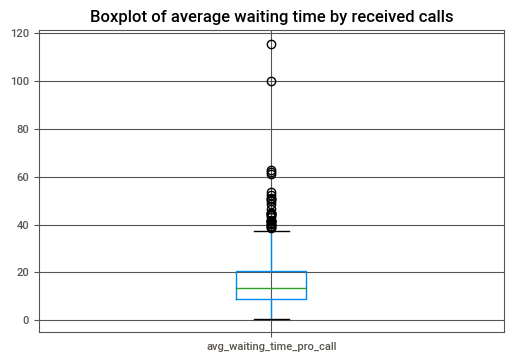

In [154]:
plt.title('Boxplot of average waiting time by received calls')
W1.boxplot(column=['avg_waiting_time_pro_call'])
plt.show()

Here is the visualization where we can see the most operators and their average time and the outliers operators.

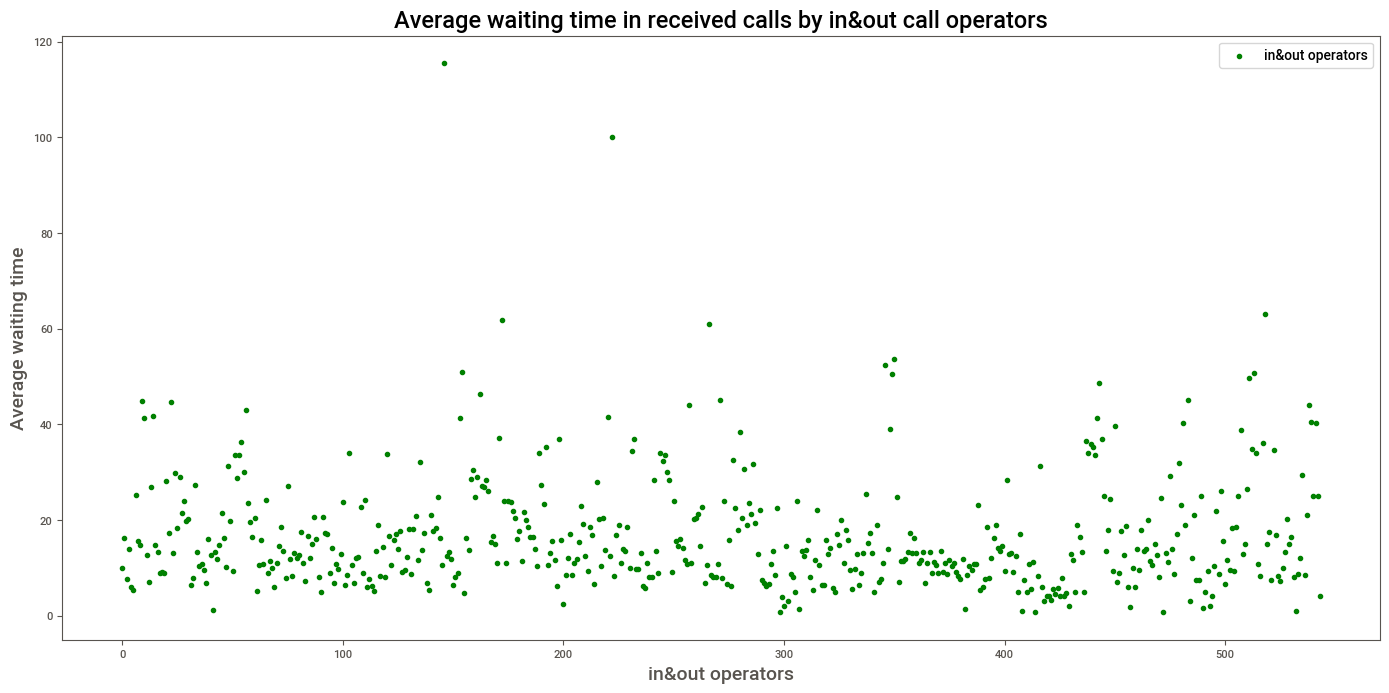

In [155]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(W1)))
ax = plt.scatter(x_values, W1.avg_waiting_time_pro_call,label='in&out operators',color = 'green')


plt.title('Average waiting time in received calls by in&out call operators',fontdict={'size':17})
plt.xlabel('in&out operators',fontdict={'size':14})
plt.ylabel('Average waiting time',fontdict={'size':14})
plt.legend()
plt.show()

Visualization for average waiting time by received calls in in&out calls only operators.

In [167]:
W = W1.query('avg_waiting_time_pro_call > 37.5').sort_values(by='avg_waiting_time_pro_call',ascending = False).head(13)
W

,operator_id,is_missed_call,calls_count,waiting_time,avg_waiting_time_pro_call
249,905842,False,2,231,115.5
386,917680,False,2,200,100.0
883,960296,False,2,126,63.0
282,907174,False,9,557,61.9
456,922114,False,1,61,61.0
616,937366,False,3,161,53.7
607,935956,False,2,105,52.5
259,906076,False,24,1223,51.0
876,958470,False,3,152,50.7
615,937362,False,5,253,50.6


Top 13 highest waiting time pro received call by in&out operators.

In [169]:
W['operator_id'] = W['operator_id'].astype(str)

I converted operator_id to object dtype for easier plotting.

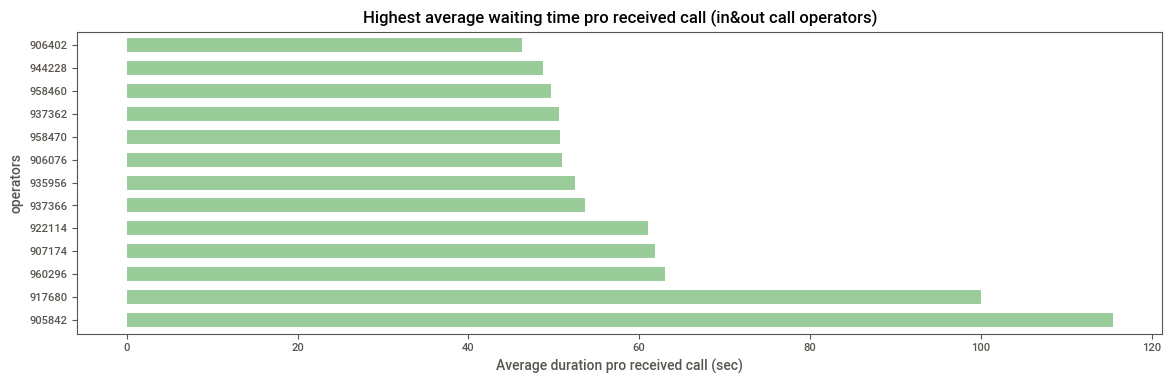

In [170]:
plt.figure(figsize=(14,4))
plt.hlines(y = W.operator_id, xmax = W.avg_waiting_time_pro_call,xmin = 0, color = 'green', alpha=0.4, linewidth=10)
plt.title('Highest average waiting time pro received call (in&out call operators)')
plt.xlabel('Average duration pro received call (sec)')
plt.ylabel('operators')
plt.show()

Here is the visualization for in&out calls operators with highest averages waiting time pro received call.

### 3. Outgoing calls by outgoing calls only operators

If an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.

In [171]:
T = known_operators[known_operators.operator_id.isin(operators_outgoing_only)]
T.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call
9,166377,2019-08-06,out,False,881278,True,3,0,29,B,2019-08-01,29,9.7
11,166377,2019-08-06,out,True,881278,True,2,0,5,B,2019-08-01,5,2.5
347,166377,2019-10-21,out,False,881278,False,3,465,476,B,2019-08-01,11,3.7
379,166377,2019-10-28,out,False,881278,True,1,0,5,B,2019-08-01,5,5.0
422,166377,2019-11-07,out,True,881278,True,2,0,0,B,2019-08-01,0,0.0


In T frame we have only observations from operators that do only outgoing calls.

In [172]:
T['days_after_starting_date'] = (T['date'] - T['date_start']).dt.days
T.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,waiting_time,waiting_time_pro_call,days_after_starting_date
9,166377,2019-08-06,out,False,881278,True,3,0,29,B,2019-08-01,29,9.7,5
11,166377,2019-08-06,out,True,881278,True,2,0,5,B,2019-08-01,5,2.5,5
347,166377,2019-10-21,out,False,881278,False,3,465,476,B,2019-08-01,11,3.7,81
379,166377,2019-10-28,out,False,881278,True,1,0,5,B,2019-08-01,5,5.0,88
422,166377,2019-11-07,out,True,881278,True,2,0,0,B,2019-08-01,0,0.0,98


For every observation we have days_after_starting_date which says how many days after a user started using a certain operator the call happened.

In [173]:
age_call_cnt = T.groupby('operator_id').agg({'calls_count': 'sum','days_after_starting_date': 'max'}).reset_index()
age_call_cnt.head()

,operator_id,calls_count,days_after_starting_date
0,880240,47,28
1,881278,20,116
2,883018,2,1
3,883898,1,1
4,884402,4,36


I grouped all the observations from T by operator_id and summed up the call_counts and extracted the maximum days_after_starting_date. I called this new frame 'age_call_cnt'.

In [174]:
age_call_cnt.rename(columns = {'calls_count': 'total_calls', 'days_after_starting_date': 'operators_age'}, inplace = True)
age_call_cnt.head()

,operator_id,total_calls,operators_age
0,880240,47,28
1,881278,20,116
2,883018,2,1
3,883898,1,1
4,884402,4,36


I renamed the columns in age_call_cnt.

In [175]:
age_call_cnt['avg_calls_number_per_day'] = (age_call_cnt['total_calls']/age_call_cnt['operators_age']).round(1)
age_call_cnt.head()

,operator_id,total_calls,operators_age,avg_calls_number_per_day
0,880240,47,28,1.7
1,881278,20,116,0.2
2,883018,2,1,2.0
3,883898,1,1,1.0
4,884402,4,36,0.1


I added avg_calls_number_per_day column where we see average number of calls per day.

In [176]:
age_call_cnt.query('operators_age==0')

,operator_id,total_calls,operators_age,avg_calls_number_per_day
225,945074,3,0,inf
226,945274,1,0,inf


These two operator made 3 and 1 call on the same day user started using the services. We should not include them in further analysis.

In [177]:
age_call_cnt.query('operators_age!=0').avg_calls_number_per_day.describe()

count    336.000000
mean      23.772024
std       45.661038
min        0.000000
25%        0.300000
50%        2.350000
75%       32.475000
max      439.900000
Name: avg_calls_number_per_day, dtype: float64

Out of 336 operators, even 50% have average number of calls per day under 3.

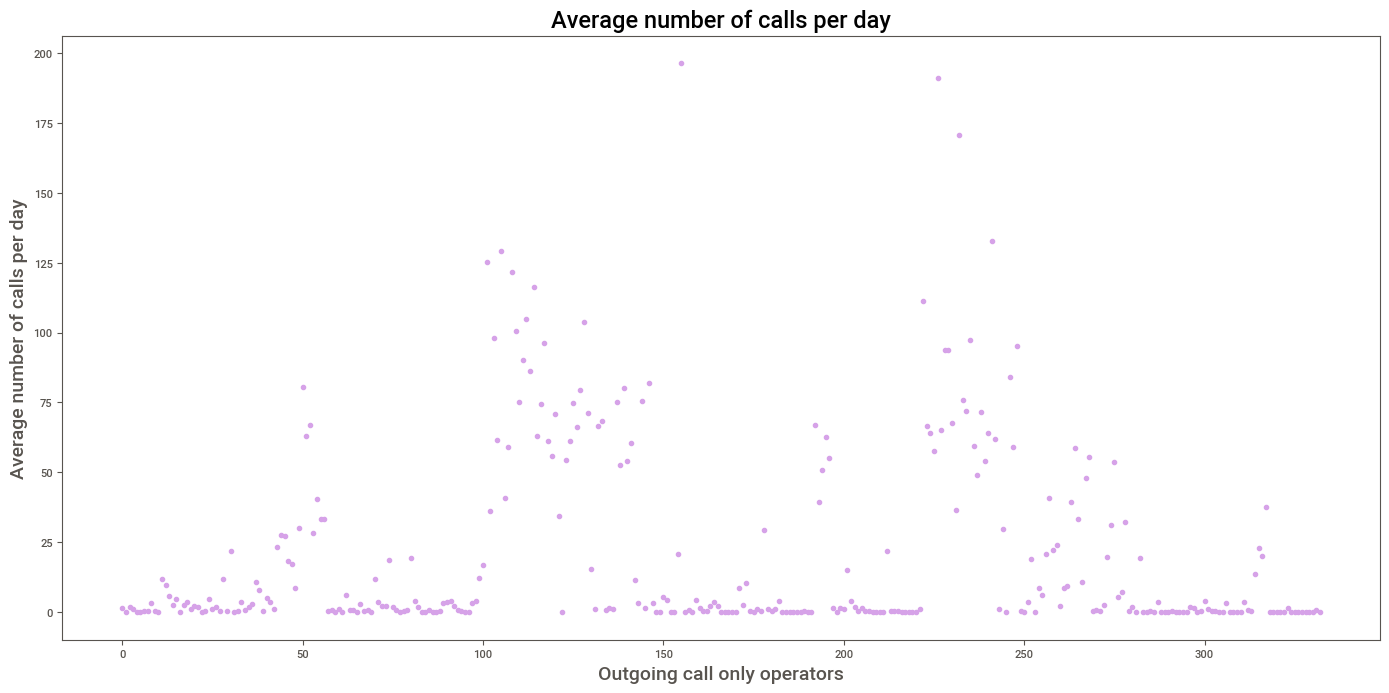

In [178]:
fig,ax=plt.subplots(figsize=(17,8))

x_values = pd.Series(range(0,len(age_call_cnt.query('operators_age!=0 & avg_calls_number_per_day < 200'))))
ax = plt.scatter(x_values, age_call_cnt.query('operators_age!=0 & avg_calls_number_per_day < 200').avg_calls_number_per_day,color = '#D6A2E8')


plt.title('Average number of calls per day',fontdict={'size':17})
plt.xlabel('Outgoing call only operators',fontdict={'size':14})
plt.ylabel('Average number of calls per day',fontdict={'size':14})
plt.show()

From this visualization we can see there are most of the operators under the 10 calls per day.

In [179]:
bad_operators = age_call_cnt.query('operators_age!=0 & avg_calls_number_per_day < 10')
bad_operators.head()

,operator_id,total_calls,operators_age,avg_calls_number_per_day
0,880240,47,28,1.7
1,881278,20,116,0.2
2,883018,2,1,2.0
3,883898,1,1,1.0
4,884402,4,36,0.1


In bad_operators frame we have operators who have under the 10 calls per day.

In [180]:
len(bad_operators)

216

There are 216 operators with average number of calls per day under 10.

In [181]:
columns_for_clustering = bad_operators[['operators_age','avg_calls_number_per_day']]
columns_for_clustering.head()

,operators_age,avg_calls_number_per_day
0,28,1.7
1,116,0.2
2,1,2.0
3,1,1.0
4,36,0.1


I use 'operators_age' and 'avg_calls_number_per_day' to define different groups of operators who have under 10 calls per day on average.

In [182]:
sc = StandardScaler()
X_sc = sc.fit_transform(columns_for_clustering)
linked = linkage(X_sc, method = 'ward')

I am standardization the columns_for_clustering data before passing it to the algorithm.

In [ ]:
#plt.figure(figsize=(15, 10))
#dendrogram(linked, orientation='top')
#plt.title('Hierarchial clustering for outgoing_only')
#plt.show()

This dendogram helped to define number of clusters there are going to be.

In [183]:
km = KMeans(n_clusters=3,random_state = 0)
labels = km.fit_predict(X_sc)
labels

array([2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2], dtype=int32)

I defined the k_means model with 3 clusters. The algorithm assigned a number from 0 to 2 to the input data.

In [184]:
bad_operators['cluster_km']=labels
bad_operators.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,operator_id,total_calls,operators_age,avg_calls_number_per_day,cluster_km
0,880240,47,28,1.7,2
1,881278,20,116,0.2,0
2,883018,2,1,2.0,2
3,883898,1,1,1.0,2
4,884402,4,36,0.1,2


I stored cluster labels in the field bad_operators.

In [185]:
bad_operators.groupby('cluster_km').avg_calls_number_per_day.mean()

cluster_km
0    1.425676
1    5.960870
2    0.568908
Name: avg_calls_number_per_day, dtype: float64

Mean values per cluster.

Here cluster 1 has the highest average number of calls per day: 5.9.<br>
Cluster 0 has 1.42 average number of calls per day.<br>
Cluster 2 has 0.56 average number of calls per day.

In [187]:
bad_operators.query('cluster_km==0').avg_calls_number_per_day.describe()

count    74.000000
mean      1.425676
std       1.515406
min       0.000000
25%       0.125000
50%       0.800000
75%       2.475000
max       6.100000
Name: avg_calls_number_per_day, dtype: float64

In cluster 0 we have avg_calls_number_per_day from 0 to 6.1.

In [188]:
bad_operators.query('cluster_km==0').operators_age.describe()

count     74.000000
mean      85.256757
std       17.054354
min       60.000000
25%       71.000000
50%       82.500000
75%      104.750000
max      118.000000
Name: operators_age, dtype: float64

In cluster 0 we have operators_age from 60 to 118.

In [189]:
len(bad_operators.query('cluster_km==0'))

74

There are 74 bad operators in this group.

In [211]:
bad_operators.query('cluster_km==0').operator_id.unique()

array([881278, 890232, 891152, 891154, 891156, 891158, 891160, 891162,
       891166, 891170, 894226, 896008, 905570, 906866, 907180, 907442,
       909910, 910520, 910532, 910902, 910926, 914238, 914338, 914626,
       915358, 915360, 915558, 918390, 918452, 920146, 921116, 921316,
       922476, 923250, 924356, 924370, 924572, 928282, 928284, 929544,
       930524, 930662, 930912, 930914, 932050, 937352, 939236, 939886,
       943050, 945728, 947480, 950444, 951648, 954642, 955068, 955082,
       955086, 955090, 955094, 955820, 956298, 957022, 960666, 960670,
       960672, 960674, 960950, 962904, 963716, 964716, 965328, 969600,
       972408, 972410])

In [192]:
bad_operators.query('cluster_km==0 & avg_calls_number_per_day ==0').operator_id.unique()

array([914626, 924572, 928282, 928284, 955068, 955086, 955094, 960666,
       960670, 960674, 962904, 963716])

These are top ineffective operators in cluster 0.

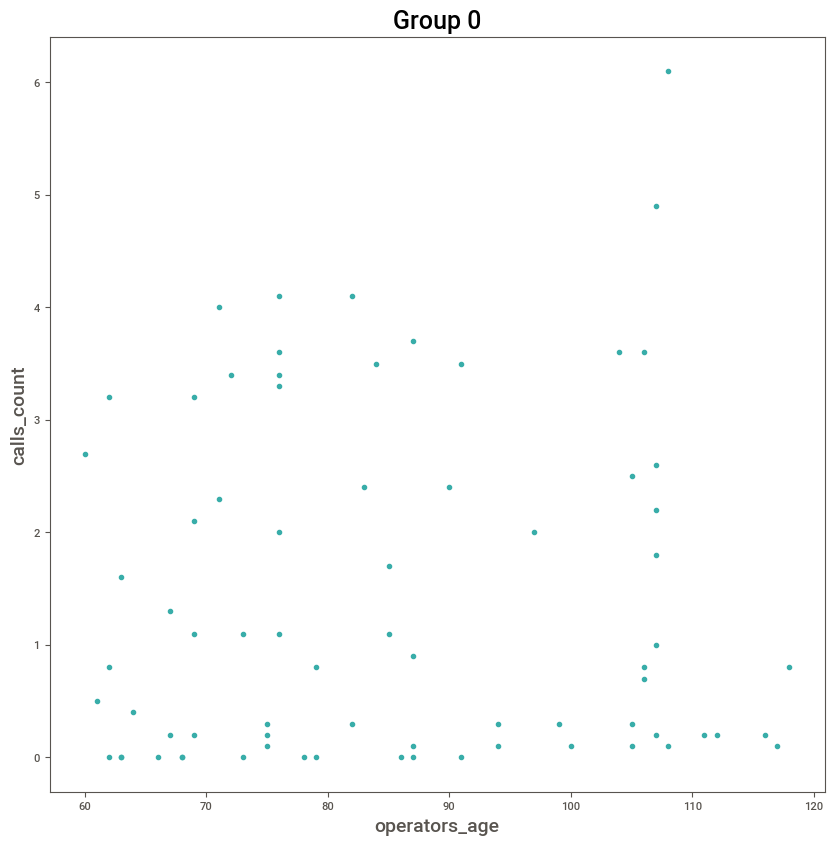

In [193]:
x = bad_operators.query('cluster_km==0')['operators_age'].values
y = bad_operators.query('cluster_km==0')['avg_calls_number_per_day'].values
#types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y,color='#38ada9')

ax.set_xlabel('operators_age', fontsize=14)
ax.set_ylabel('calls_count', fontsize=14)
ax.set_title('Group 0', fontsize=18)
plt.show()

Here we see the visualization that shows the age and average number of calls per day for every operator.

In [194]:
bad_operators.query('cluster_km==0 & avg_calls_number_per_day==0').sort_values(by='avg_calls_number_per_day')

,operator_id,total_calls,operators_age,avg_calls_number_per_day,cluster_km
88,914626,1,87,0.0,0
151,924572,1,62,0.0,0
154,928282,2,68,0.0,0
155,928284,2,63,0.0,0
293,955068,2,86,0.0,0
295,955086,1,91,0.0,0
297,955094,2,73,0.0,0
309,960666,1,63,0.0,0
310,960670,3,68,0.0,0
312,960674,2,66,0.0,0


Top ineffective operators in cluster 0.

In [195]:
bad_operators.query('cluster_km==1').operators_age.describe()

count    23.000000
mean     29.521739
std      21.279246
min       2.000000
25%      11.500000
50%      23.000000
75%      48.000000
max      71.000000
Name: operators_age, dtype: float64

In cluster 1 we have minimum age 2 days and maximum age 71 days.

In [196]:
len(bad_operators.query('cluster_km==1'))

23

There are 23 low effective operators in this cluster 1.

In [197]:
bad_operators.query('cluster_km==1').operator_id.unique()

array([887992, 890420, 890422, 891252, 894934, 896390, 898434, 898902,
       899972, 915504, 925134, 928228, 930586, 933806, 937650, 947590,
       947598, 947600, 947640, 947644, 952460, 952466, 958480])

This is the list of all bad operators from cluster 1.

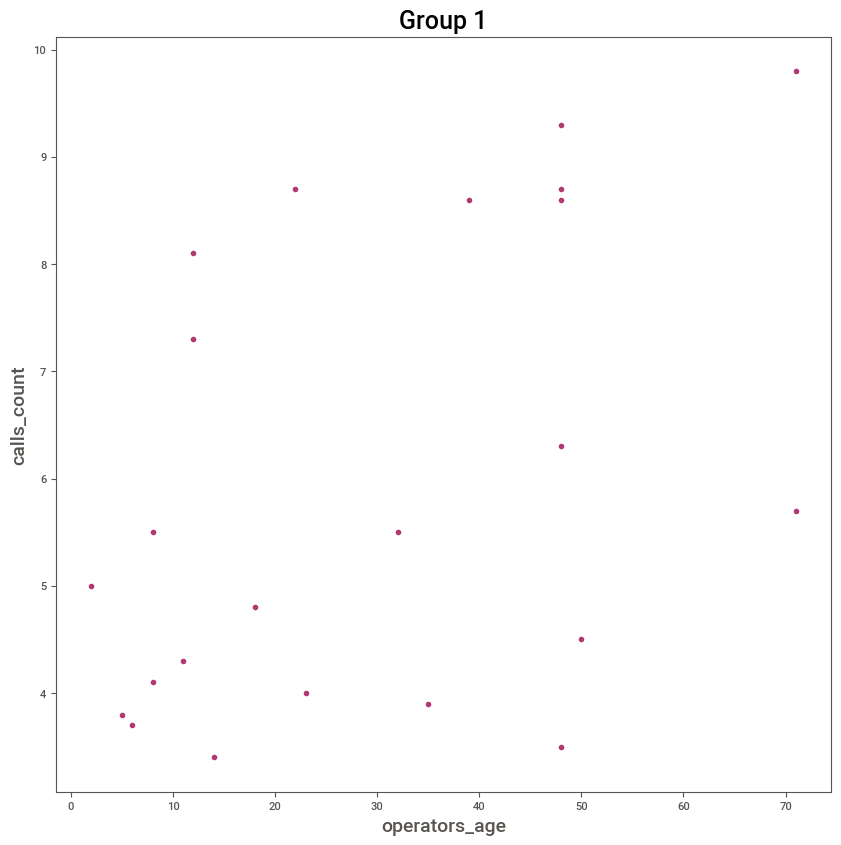

In [198]:
x = bad_operators.query('cluster_km==1')['operators_age'].values
y = bad_operators.query('cluster_km==1')['avg_calls_number_per_day'].values
#types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y,color='#B33771')

ax.set_xlabel('operators_age', fontsize=14)
ax.set_ylabel('calls_count', fontsize=14)
ax.set_title('Group 1', fontsize=18)
plt.show()

Vizualization for Cluster 1.

In [199]:
bad_operators.query('cluster_km==1').sort_values(by='avg_calls_number_per_day').head()

,operator_id,total_calls,operators_age,avg_calls_number_per_day,cluster_km
8,887992,47,14,3.4,1
256,947590,166,48,3.5,1
41,898902,22,6,3.7,1
33,894934,19,5,3.8,1
305,958480,138,35,3.9,1


Top ineffective operators in cluster 1.

In [205]:
bad_operators.query('cluster_km==2').operators_age.describe()

count    119.000000
mean      29.285714
std       14.653132
min        1.000000
25%       17.000000
50%       30.000000
75%       41.500000
max       60.000000
Name: operators_age, dtype: float64

In cluster 2 we have minimum age 1 days and maximum age 60 days.

In [206]:
len(bad_operators.query('cluster_km==2'))

119

There are 119 low effective operators in this group.

In [207]:
bad_operators.query('cluster_km==2').head()

,operator_id,total_calls,operators_age,avg_calls_number_per_day,cluster_km
0,880240,47,28,1.7,2
2,883018,2,1,2.0,2
3,883898,1,1,1.0,2
4,884402,4,36,0.1,2
5,884406,3,48,0.1,2


In [212]:
bad_operators.query('cluster_km==2').operator_id.unique()

array([880240, 883018, 883898, 884402, 884406, 885682, 887280, 890234,
       891192, 891250, 891746, 891970, 891976, 892800, 893700, 895370,
       896384, 897894, 899076, 905308, 905470, 905480, 905840, 907998,
       908718, 908984, 909308, 909452, 910524, 910594, 914036, 914240,
       914266, 914272, 914348, 914816, 916596, 917446, 917682, 917890,
       919418, 920928, 929542, 930590, 930692, 932088, 932246, 932676,
       932856, 933452, 933810, 935246, 936296, 937156, 937422, 937428,
       937430, 937710, 937716, 937720, 937770, 937772, 937778, 937870,
       937872, 937900, 938842, 939718, 939736, 940460, 940474, 940486,
       940782, 940788, 940802, 940814, 940842, 940848, 941736, 941740,
       941810, 941816, 941826, 941838, 941842, 942174, 945898, 946454,
       947596, 947636, 947820, 951408, 953362, 953458, 953460, 954284,
       954376, 954378, 954380, 958440, 958444, 958458, 958472, 958672,
       959118, 959596, 965232, 967204, 969262, 969268, 969284, 969286,
      

In [208]:
bad_operators.query('cluster_km==2 & avg_calls_number_per_day==0').operator_id.unique()

array([914272, 917890, 919418, 929542, 932246, 937716, 937770, 937778,
       947596, 954284, 958458, 969262, 969284, 970250, 970258])

This is the list of top ineffective operators in cluster 2.

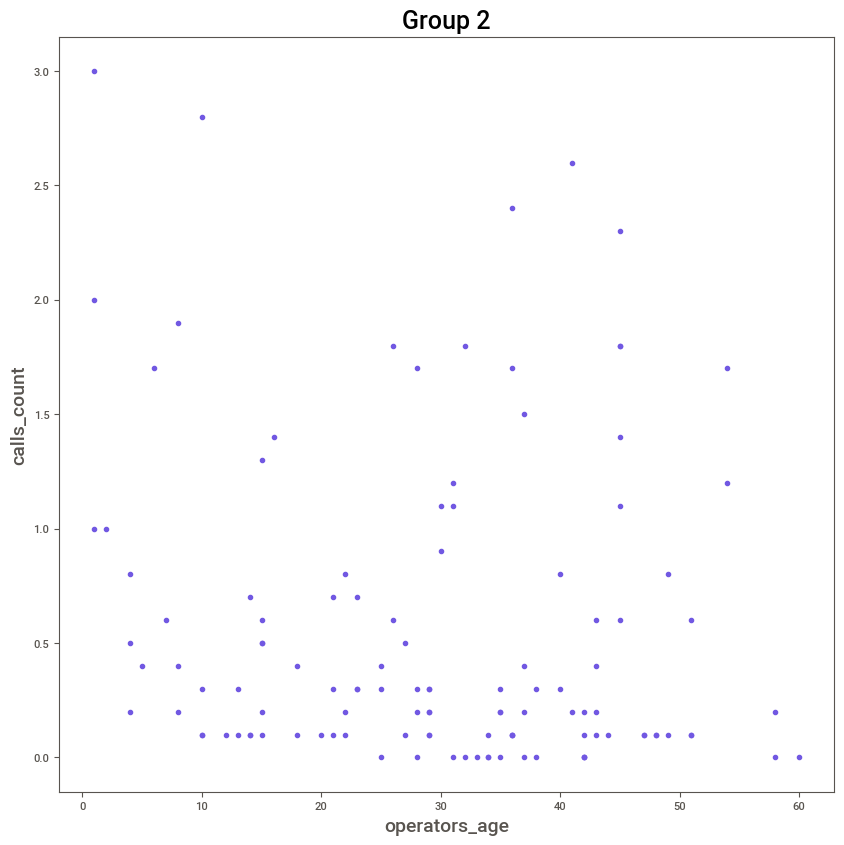

In [209]:
x = bad_operators.query('cluster_km==2')['operators_age'].values
y = bad_operators.query('cluster_km==2')['avg_calls_number_per_day'].values
#types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y,color='#7158e2')

ax.set_xlabel('operators_age', fontsize=14)
ax.set_ylabel('calls_count', fontsize=14)
ax.set_title('Group 2', fontsize=18)
plt.show()

These operator are less than 60 days old.

### Conclusion:

    1. top 3 ineffective in&out operators: 957922, 897872, 937432, 902532, 911310, 937732,882688, 882690, 884412.
    2. top 3 ineffective incoming calls only operators: 934098, 924936, 930242,896538, 899900, 901498

   The most ineffective outgoing only calls operators:<br>
   
       914626, 924572, 928282, 928284, 955068, 955086, 955094, 960666, 960670, 960674, 962904, 963716,914272,917890,919418, 929542, 932246, 937716, 937770, 937778, 947596, 954284, 958458, 969262, 969284, 970250, 970258
    
        

## 4. Hypotheses

**Find the statistical significance of the difference in average waiting time pro incoming call in two groups.**

In [ ]:
known_operators[known_operators.operator_id.isin(operators_incoming_only)].head()

In [ ]:
A = known_operators[known_operators.operator_id.isin(operators_incoming_only)]\
                                    .groupby('operator_id')['waiting_time_pro_call'].mean().reset_index()
A.head()

H0 ="Distribution of average waiting time pro incoming call in group A is normal."; null hypothesis.

H1 ="Distribution of average waiting time pro incoming call in group A is not normal."; alternative hypothesis.

(statistical significance level) alpha = 0.05

Now I will use Shapiro-Wilk test to check is the conversion normally distributed. 

In [ ]:
st.shapiro(A['waiting_time_pro_call'])

p-value is smaller than alpha so we can reject null hypothesis and accept the alternative:<br>
"Distribution of average waiting time pro incoming call in group A is not normal."

In [ ]:
known_operators[known_operators.operator_id.isin(in_out_operators)].query('direction=="in"').head()

In [ ]:
B = known_operators[known_operators.operator_id.isin(in_out_operators)]\
                                    .groupby('operator_id')['waiting_time_pro_call'].mean().reset_index()
B.head()

H0 ="Distribution of average waiting time pro incoming call in group B is normal."; null hypothesis.

H1 ="Distribution of average waiting time pro incoming call in group B is not normal."; alternative hypothesis.

(statistical significance level) alpha = 0.05

Now I will use Shapiro-Wilk test to check is the conversion normally distributed. 

In [ ]:
st.shapiro(B['waiting_time_pro_call'])

p-value is smaller than alpha so we can reject null hypothesis and accept the alternative:<br>
"Distribution of average waiting time pro incoming call in group B is not normal."

Now we have got two not normal distribution of data so we can use the mannwhitneyu test.

H0 ="There is no statistical difference in average waiting time pro call by incoming calls between incoming calls only operators and in&out calls operator"; null hypothesis.

H1 ="There is a statistical difference in average waiting time pro call by incoming calls between incoming calls only operators and in&out calls operator."; alternative hypothesis.

(statistical significance level) alpha = 0.05

In [ ]:
st.mannwhitneyu(A['waiting_time_pro_call'],B['waiting_time_pro_call'])

Considering statistical significance level 0.05, our p-value from the mannwhitneyu test is smaller than 0.05 so we can reject the null hypothesis and accept the alternative:<br>
"There is a statistical difference in average waiting time pro call by incoming calls between incoming calls only operators and in&out calls operator."; alternative hypothesis.

In [ ]:
A['waiting_time_pro_call'].mean()

In [ ]:
B['waiting_time_pro_call'].mean()

**Average waiting time pro incoming call is statistically higher by incoming calls only operators.**

## 5. General conclusion:

754 operators made incoming calls.<br>
882 operators made outgoing calls.<br>
210 operators made **only** incoming calls.<br>
338 operators made **only** outgoing calls.<br>
544 operators made in&out calls.

There are 19 operators with more than 10% of missing calls (6 are incoming calls only operators and 13 in&out calls operators):

    1. top 3 ineffective in&out operators: 957922, 897872, 937432.
    2. top 3 ineffective incoming calls only operators: 934098, 924936, 930242.
    
Looking at missed incoming calls: in&out operators have the highest average waiting time pro call.<br>
    
    1. top 3 ineffective in&out operators: 902532, 911310, 937732.

Looking at received incoming calls:<br>

    75% of incoming only calls operators have 25 seconds for an average waiting time pro received call.
    Top 3 ineffective ones:
    
        896538, 899900, 901498.
  
    75% of in&out operators have 20 seconds for an average waiting time pro received call.
    Top 3 ineffective ones:
    
        882688, 882690, 884412.
    
In&out operators have lower waiting time than incoming only calls operators.

Looking at outgoing only calls operators:<br>

    Average number of calls per day: 23.
    Out of 338 operators, 50% have average number of calls per day under 3.
    Operators in cluster 0 and 2 I consider to be the most ineffective:
    
        914626, 924572, 928282, 928284, 955068, 955086, 955094, 960666, 960670, 960674, 962904, 963716,914272,917890,919418, 929542, 932246, 937716, 937770, 937778, 947596, 954284, 958458, 969262, 969284, 970250, 970258
        

Knowing the average waiting time pro incoming call is statistically higher by incoming calls, I would recommend to users to switch to in&out calls operators.

In raw data were more numbers of missed calls than received.<br>
After working on calls where the operator_id is known, data showed more received calls than missed.<br>

Knowing this information it would be wise to find out all the operators and then redo the analysis.